Load Fitur yang sudah di Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump,load

data = pd.read_csv('Data/Fitur.csv')
X = data

reg_model = load('regression_Exam.pkl')

data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,0,2,0,7,73,0,1,0,0,1,1,2,3,0,0,2,1
1,19,64,0,1,0,8,59,0,1,2,1,1,1,0,4,0,1,1,0
2,24,98,1,1,1,7,91,1,1,2,1,1,1,1,4,0,2,2,1
3,29,89,0,1,1,8,98,1,1,1,1,1,1,0,4,0,0,1,1
4,19,92,1,1,1,6,65,1,1,3,1,2,1,1,4,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,25,69,2,1,0,7,76,1,1,1,2,1,1,2,2,0,0,2,0
6244,23,76,2,1,0,8,81,1,1,3,0,2,1,2,2,0,0,2,0
6245,20,90,1,0,1,6,65,0,1,3,0,1,1,0,2,0,2,2,0
6246,10,86,2,2,1,6,91,2,1,2,0,1,0,2,3,0,0,0,0


In [ ]:
y_pred_exam = reg_model.predict(X)

In [ ]:
y_label = [1 if score > 60 else 0 for score in y_pred_exam]

Load Model Regresi yang telah dibangun

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_label, test_size=0.3, random_state=42)

In [ ]:
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVC": svm.SVC()
}

In [ ]:
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix

for model_name, model in models.items():
    model.fit(X_train_c,y_train_c)

for model_name, model in models.items():
    print(f"Model: {model_name}")
    predictions = model.predict(X_test_c)
    print(f"Akurasi: \n", accuracy_score(y_test_c, predictions))
    print(f"Report: \n", classification_report(y_test_c, predictions))
    print(f"Confusion Matrix: \n", confusion_matrix(y_test_c, predictions))
    print("=" * 50)

Model: DecisionTree
Akurasi: 
 0.9925333333333334
Report: 
               precision    recall  f1-score   support

           0       0.20      0.60      0.30         5
           1       1.00      0.99      1.00      1870

    accuracy                           0.99      1875
   macro avg       0.60      0.80      0.65      1875
weighted avg       1.00      0.99      0.99      1875

Confusion Matrix: 
 [[   3    2]
 [  12 1858]]
Model: LogisticRegression
Akurasi: 
 0.9973333333333333
Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      1.00      1.00      1870

    accuracy                           1.00      1875
   macro avg       0.50      0.50      0.50      1875
weighted avg       0.99      1.00      1.00      1875

Confusion Matrix: 
 [[   0    5]
 [   0 1870]]
Model: SVC
Akurasi: 
 0.9973333333333333
Report: 
               precision    recall  f1-score   support

           0       0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

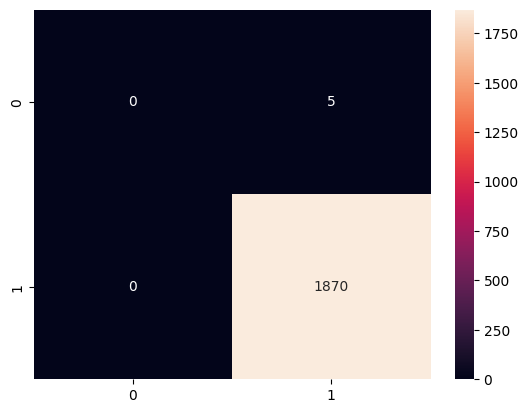

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test_c, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Best Model Selection

In [ ]:

for model_name, model in models.items():
    model.fit(X_train_c,y_train_c)

for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_train_pred_c = model.predict(X_train_c)
    train_acc = accuracy_score(y_train_c, y_train_pred_c)
    # Prediksi testing
    y_test_pred = model.predict(X_test_c)
    test_acc = accuracy_score(y_test_c, y_test_pred)
    print(f"Akurasi Training: {train_acc:.4f}")
    print(f"Akurasi Testing: {test_acc:.4f}\n")

Model: DecisionTree
Akurasi Training: 1.0000
Akurasi Testing: 0.9915

Model: LogisticRegression
Akurasi Training: 0.9938
Akurasi Testing: 0.9973

Model: SVC
Akurasi Training: 0.9936
Akurasi Testing: 0.9973



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
best_model = models['LogisticRegression']
# Prediksi training
y_train_pred_c = best_model.predict(X_train_c)
train_acc = accuracy_score(y_train_c, y_train_pred_c)

# Prediksi testing
y_test_pred = best_model.predict(X_test_c)
test_acc = accuracy_score(y_test_c, y_test_pred)

print(f"Akurasi Training: {train_acc:.4f}")
print(f"Akurasi Testing: {test_acc:.4f}")

Akurasi Training: 0.9938
Akurasi Testing: 0.9973


In [ ]:
# prediksi data baru
sample_data = pd.DataFrame({
    'Hours_Studied': [0],
    'Attendance': [30],
    'Parental_Involvement': [0],
    'Access_to_Resources': [2],
    'Extracurricular_Activities': [1],
    'Sleep_Hours': [6],
    'Previous_Scores': [20],
    'Motivation_Level': [0],
    'Internet_Access': [0],
    'Tutoring_Sessions': [0],
    'Family_Income': [0],
    'Teacher_Quality': [0],
    'School_Type': [1],
    'Peer_Influence': [0],
    'Physical_Activity': [0],
    'Learning_Disabilities': [0],
    'Parental_Education_Level': [1],
    'Distance_from_Home': [2],
    'Gender': [1]
})

# Prediksi skor ujian
prediction = best_model.predict(sample_data)
result = "Lulus" if prediction[0] == 1 else "Tidak Lulus"
print(f"\nPrediction Result: {result}")


Prediction Result: Tidak Lulus


In [ ]:
from joblib import dump

dump(model,'Clasification_Graduation.pkl')

['Clasification_Graduation.pkl']